In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#import train dataset

df_train = pd.read_csv('/content/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df_train.shape

(474330, 12)

In [ ]:
#import test dataset

df_test = pd.read_csv('/content/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
df_test.shape

(233599, 11)

In [ ]:
# merge train and test dataset

df = df_train.append(df_test)
df.shape

<ipython-input-8-3a1c83ba39d6>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


(707929, 12)

In [ ]:
# basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707929 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     707929 non-null  int64  
 1   Product_ID                  707929 non-null  object 
 2   Gender                      707929 non-null  object 
 3   Age                         707929 non-null  object 
 4   Occupation                  707929 non-null  int64  
 5   City_Category               707929 non-null  object 
 6   Stay_In_Current_City_Years  707929 non-null  object 
 7   Marital_Status              707929 non-null  int64  
 8   Product_Category_1          707929 non-null  int64  
 9   Product_Category_2          488341 non-null  float64
 10  Product_Category_3          216093 non-null  float64
 11  Purchase                    474330 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 70.2+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.079290e+05,707929.000000,707929.000000,707929.000000,488341.000000,216093.000000,474330.000000
mean,1.003004e+06,8.081059,0.409661,5.290350,9.846183,12.663659,9329.935792
std,1.735518e+03,6.525627,0.491772,3.744418,5.089909,4.126182,4980.059205
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,10.000000
25%,1.001471e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003044e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8061.000000
75%,1.004460e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12070.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [ ]:
# drop useless columns

df.drop(['User_ID'],axis=1,inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
# Handling Categorical Feature Gender
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
# Handling Categorical Feature Age

df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
# Handling categorical feature City_Category

# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'City_Category'.
df['City_Category']= label_encoder.fit_transform(df['City_Category'])

df['City_Category'].unique()


array([0, 2, 1])

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,2,4+,0,8,NaN,NaN,7969.0


In [ ]:
df.shape

(707929, 11)

In [ ]:
# Handling categorical feature Stay_In_Current_City_Years

# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'City_Category'.
df['Stay_In_Current_City_Years']= label_encoder.fit_transform(df['Stay_In_Current_City_Years'])

df['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,2,4,0,8,NaN,NaN,7969.0


In [ ]:
df['Marital_Status'].unique()

array([0, 1])

In [ ]:
df['Marital_Status'].dtype

dtype('int64')

In [ ]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

In [ ]:
# let's handle missing values

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            219588
Product_Category_3            491836
Purchase                      233599
dtype: int64

In [ ]:
# focus on product_category_2

df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
df['Product_Category_2'].value_counts()

8.0     82782
14.0    71586
2.0     64021
16.0    56091
15.0    49216
5.0     33806
4.0     33323
6.0     21417
11.0    18324
17.0    17325
13.0    13707
9.0      7426
12.0     7100
10.0     4026
3.0      3752
18.0     3670
7.0       769
Name: Product_Category_2, dtype: int64

In [ ]:
df['Product_Category_2'].mean()

9.846183302241672

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,2,4,0,8,NaN,NaN,7969.0


In [ ]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            491836
Purchase                      233599
dtype: int64

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,8.0,NaN,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,8.0,NaN,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,2,4,0,8,8.0,NaN,7969.0


In [ ]:
# Replace missing values product category 3

df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [ ]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [ ]:
df['Product_Category_3'].isnull().sum()

0

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,2,4,0,8,8.0,16.0,7969.0


In [ ]:
# doing one hot encoding for City_Category and Stay in currenct city years

ohe = pd.get_dummies(df['City_Category'],drop_first=True)

In [ ]:
df = pd.concat([df,ohe],axis=1)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,1,2
0,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,2,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
df.drop(columns='City_Category',axis=1,inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,1,2
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
# removing Product_Category_3 because of having many nan values

df = df.drop(columns=['Product_Category_3'])

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,1,2
0,P00069042,0,1,10,2,0,3,8.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,7969.0,0,1


In [ ]:
df.corr()

<ipython-input-45-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,1,2
Gender,1.000000,-0.004982,0.115817,0.015503,-0.010199,-0.046589,-0.011603,0.060504,-0.005365,-0.000543
Age,-0.004982,1.000000,0.091076,-0.005163,0.311255,0.060613,0.041957,0.017025,-0.015404,0.109862
Occupation,0.115817,0.091076,1.000000,0.029225,0.023035,-0.009153,0.001066,0.021267,-0.013306,0.036193
Stay_In_Current_City_Years,0.015503,-0.005163,0.029225,1.000000,-0.012327,-0.002984,0.000091,0.005087,0.010779,0.010786
Marital_Status,-0.010199,0.311255,0.023035,-0.012327,1.000000,0.019899,0.012311,-0.000297,-0.001616,0.033808
Product_Category_1,-0.046589,0.060613,-0.009153,-0.002984,0.019899,1.000000,0.303554,-0.313331,0.001093,-0.023345
Product_Category_2,-0.011603,0.041957,0.001066,0.000091,0.012311,0.303554,1.000000,-0.133403,-0.004605,0.000027
Purchase,0.060504,0.017025,0.021267,0.005087,-0.000297,-0.313331,-0.133403,1.000000,-0.023156,0.068627
1,-0.005365,-0.015404,-0.013306,0.010779,-0.001616,0.001093,-0.004605,-0.023156,1.000000,-0.571474
2,-0.000543,0.109862,0.036193,0.010786,0.033808,-0.023345,0.000027,0.068627,-0.571474,1.000000


<Axes: xlabel='Age', ylabel='Purchase'>

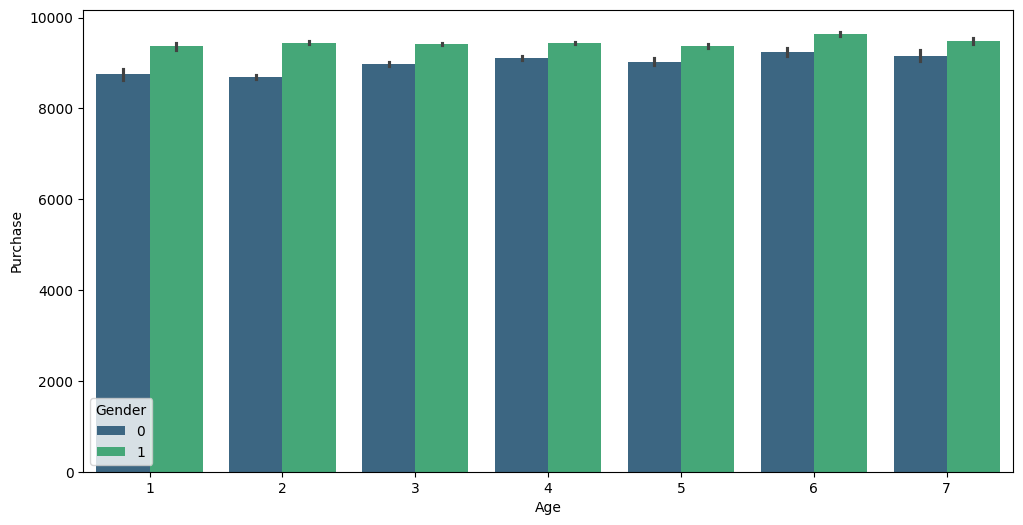

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='Age',y='Purchase',palette='viridis',hue='Gender')

In [ ]:
# visualization of Purchase with occupation



In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,1,2
0,P00069042,0,1,10,2,0,3,8.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,7969.0,0,1


<Axes: xlabel='Marital_Status', ylabel='Purchase'>

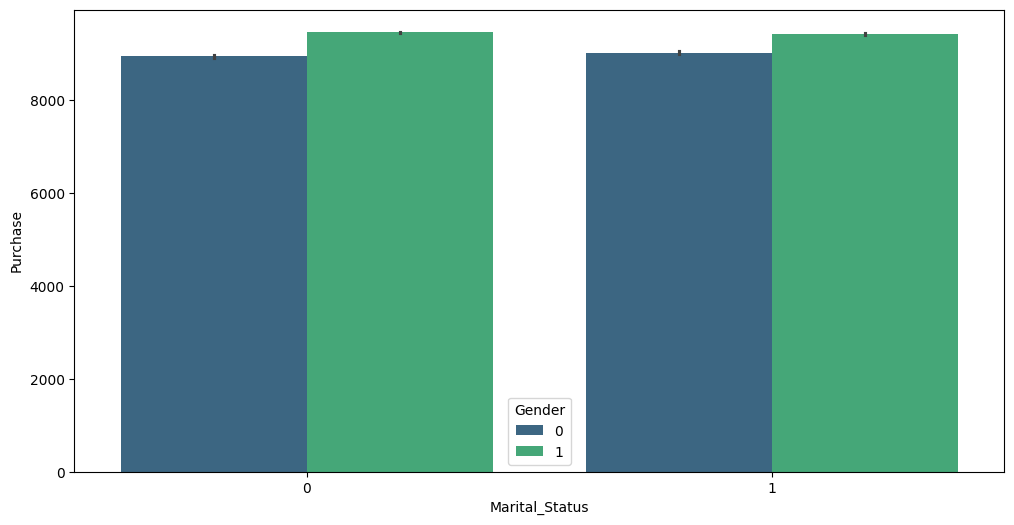

In [ ]:
# visualization of Purchase with Martial Status

plt.figure(figsize=(12,6))
sns.barplot(data=df,x='Marital_Status',y='Purchase',palette='viridis',hue='Gender')

In [ ]:
# dropping Product_ID

df = df.drop(columns=['Product_ID'])

In [ ]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,1,2
0,0,1,10,2,0,3,8.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,7969.0,0,1


In [ ]:
# Feature Scaling

df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]

In [ ]:
df_test.shape

(233599, 10)

In [ ]:
df_train.shape

(474330, 10)

In [ ]:
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,1,2
0,0,1,10,2,0,3,8.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,7969.0,0,1


In [ ]:
X = df_train.drop(columns=['Purchase'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707929 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      707929 non-null  int64  
 1   Age                         707929 non-null  int64  
 2   Occupation                  707929 non-null  int64  
 3   Stay_In_Current_City_Years  707929 non-null  int64  
 4   Marital_Status              707929 non-null  int64  
 5   Product_Category_1          707929 non-null  int64  
 6   Product_Category_2          707929 non-null  float64
 7   Purchase                    474330 non-null  float64
 8   1                           707929 non-null  uint8  
 9   2                           707929 non-null  uint8  
dtypes: float64(2), int64(6), uint8(2)
memory usage: 50.0 MB


In [ ]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,1,2
0,0,1,10,2,0,3,8.0,0,0
1,0,1,10,2,0,1,6.0,0,0
2,0,1,10,2,0,12,8.0,0,0
3,0,1,10,2,0,12,14.0,0,0
4,1,7,16,4,0,8,8.0,0,1


In [ ]:
y = df_train['Purchase']

In [ ]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [ ]:
# train test split

from sklearn.model_selection import train_test_split

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104,test_size=0.25)



In [ ]:
new_columns = {1:'A',2:'B'}
X_train.rename(columns=new_columns, inplace=True)
X_test.rename(columns=new_columns, inplace=True)
df_test.rename(columns=new_columns, inplace=True)

<ipython-input-62-dfe76d61e11f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.rename(columns=new_columns, inplace=True)


In [ ]:
df_test.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Purchase                      233599
A                                  0
B                                  0
dtype: int64

In [ ]:
df_test = df_test.drop(columns=['Purchase'])

In [ ]:
X_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,A,B
303644,1,3,3,2,0,1,16.0,0,0
365832,1,4,14,3,0,8,14.0,0,0
427095,0,3,1,2,0,3,4.0,0,0
282551,1,3,17,0,0,1,8.0,0,1
432775,1,3,17,2,1,1,14.0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
df_test = sc.transform(df_test)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
# solving above problem with linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
L = LinearRegression()

In [ ]:
L.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = L.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
print('R2 Score = ',r2_score(y_test,y_pred))
print('MSE = ',mean_squared_error(y_test,y_pred))
print('MAE = ',mean_absolute_error(y_test,y_pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score =  0.1088838118080464
MSE =  22068679.193822183
MAE =  3611.1207150114456
RMSE =  4697.731281567963
